In [34]:
import pandas as pd
import numpy as np

df_peld = pd.read_csv('../Dyadic_PELD.tsv', sep='\t')
print(df_peld.shape)
df_peld.head()

(6527, 15)


,Speaker_1,Speaker_2,Personality,Utterance_1,Utterance_2,Utterance_3,Emotion_1,Emotion_2,Emotion_3,Sentiment_1,Sentiment_2,Sentiment_3,Mood_1,Mood_2,Mood_3
0,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",also I was the point person on my company s tr...,You must ve had your hands full.,That I did. That I did.,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral
1,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",That I did. That I did.,So let s talk a little bit about your duties.,My duties? All right.,neutral,neutral,surprise,neutral,neutral,positive,neutral,neutral,M1
2,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",My duties? All right.,"Now you ll be heading a whole division, so you...",I see.,surprise,neutral,neutral,positive,neutral,neutral,M1,neutral,neutral
3,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",I see.,But there ll be perhaps 30 people under you so...,Good to know.,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral
4,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",Good to know.,We can go into detail,No don t I beg of you!,neutral,neutral,fear,neutral,neutral,negative,neutral,neutral,M2


In [35]:
def emo_to_mood(emotion):
    if emotion == 'neutral': return 'neutral'
    elif emotion == 'joy' or emotion == 'surprise': return 'M1'
    elif emotion == 'sadness': return 'M3'
    else: return 'M2'

df_peld['Mood_1'] = df_peld['Emotion_1'].apply(emo_to_mood)
df_peld['Mood_2'] = df_peld['Emotion_2'].apply(emo_to_mood)
df_peld['Mood_3'] = df_peld['Emotion_3'].apply(emo_to_mood)

df_peld.head()

,Speaker_1,Speaker_2,Personality,Utterance_1,Utterance_2,Utterance_3,Emotion_1,Emotion_2,Emotion_3,Sentiment_1,Sentiment_2,Sentiment_3,Mood_1,Mood_2,Mood_3
0,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",also I was the point person on my company s tr...,You must ve had your hands full.,That I did. That I did.,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral
1,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",That I did. That I did.,So let s talk a little bit about your duties.,My duties? All right.,neutral,neutral,surprise,neutral,neutral,positive,neutral,neutral,M1
2,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",My duties? All right.,"Now you ll be heading a whole division, so you...",I see.,surprise,neutral,neutral,positive,neutral,neutral,M1,neutral,neutral
3,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",I see.,But there ll be perhaps 30 people under you so...,Good to know.,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral
4,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",Good to know.,We can go into detail,No don t I beg of you!,neutral,neutral,fear,neutral,neutral,negative,neutral,neutral,M2


## Train Test Split

In [36]:
labels = df_peld['Emotion_3']
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
label_enc = labelencoder.fit_transform(labels)
labels = label_enc


SEED = 42
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = \
    train_test_split(df_peld, labels, random_state=SEED, test_size=0.1, stratify=labels)

train, valid, train_labels, valid_labels = \
    train_test_split(train, train_labels, random_state=SEED, test_size=0.1, stratify=train_labels)

## Utterance Length in Train, valid, and test

In [37]:
import numpy as np

def avg_utter_len(df):
    tmp = pd.concat([df['Utterance_1'], df['Utterance_2'], df['Utterance_3']], axis=0)
    tst = pd.DataFrame(tmp.unique(), columns = ['Uttr'])
    tst['len'] = tst['Uttr'].apply(lambda x: len(x.split()))
    print(tst['len'].describe())

avg_utter_len(train)
print()
avg_utter_len(valid)
print()
avg_utter_len(test)
print()
avg_utter_len(df_peld)

count    9273.000000
mean        9.262375
std         6.875877
min         1.000000
25%         4.000000
50%         7.000000
75%        13.000000
max        78.000000
Name: len, dtype: float64

count    1529.000000
mean        8.969915
std         6.809709
min         1.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        56.000000
Name: len, dtype: float64

count    1679.000000
mean        9.004765
std         6.656924
min         1.000000
25%         4.000000
50%         7.000000
75%        13.000000
max        46.000000
Name: len, dtype: float64

count    10468.000000
mean         9.323175
std          6.887027
min          1.000000
25%          4.000000
50%          8.000000
75%         13.000000
max         78.000000
Name: len, dtype: float64


## Emotion Distribution

In [38]:
def emotion_distribution(df):
    tmp = pd.concat([df['Emotion_1'], df['Emotion_2'], df['Emotion_3']], axis=0)
    print(tmp.value_counts())
    print()

emotion_distribution(train)
emotion_distribution(valid)
emotion_distribution(test)
emotion_distribution(df_peld)

neutral     7066
joy         2883
anger       1857
surprise    1550
fear        1100
sadness     1086
disgust      316
dtype: int64

neutral     782
joy         321
anger       238
surprise    155
sadness     120
fear        118
disgust      30
dtype: int64

neutral     880
joy         345
anger       247
surprise    184
sadness     141
fear        132
disgust      30
dtype: int64

neutral     8728
joy         3549
anger       2342
surprise    1889
fear        1350
sadness     1347
disgust      376
dtype: int64



## Sentiment Distribution

In [19]:
def sentiment_distribution(df):
    tmp = pd.concat([df['Sentiment_1'], df['Sentiment_2'], df['Sentiment_3']], axis=0)
    print(tmp.value_counts())
    print()

sentiment_distribution(train)
sentiment_distribution(valid)
sentiment_distribution(test)
sentiment_distribution(df_peld)

neutral     7055
positive    4400
negative    4364
dtype: int64

neutral     756
negative    503
positive    499
dtype: int64

neutral     890
negative    540
positive    523
dtype: int64

neutral     8701
positive    5422
negative    5407
dtype: int64



## Mood Distribution

In [39]:
def mood_distribution(df):
    tmp = pd.concat([df['Mood_1'], df['Mood_2'], df['Mood_3']], axis=0)
    print(tmp.value_counts())
    print()

mood_distribution(train)
mood_distribution(valid)
mood_distribution(test)
mood_distribution(df_peld)

neutral    7066
M1         4433
M2         3273
M3         1086
dtype: int64

neutral    782
M1         476
M2         386
M3         120
dtype: int64

neutral    880
M1         529
M2         409
M3         141
dtype: int64

neutral    8728
M1         5438
M2         4068
M3         1347
dtype: int64



## Triples of Main Roles

In [21]:
print(train['Speaker_1'].value_counts(), '\n')
print(valid['Speaker_1'].value_counts(), '\n')
print(test['Speaker_1'].value_counts(), '\n')
print(df_peld['Speaker_1'].value_counts())

Ross        928
Rachel      921
Joey        912
Chandler    880
Monica      850
Phoebe      782
Name: Speaker_1, dtype: int64 

Rachel      112
Joey        109
Chandler     97
Monica       94
Phoebe       87
Ross         87
Name: Speaker_1, dtype: int64 

Rachel      123
Ross        108
Chandler    108
Monica      107
Phoebe      103
Joey        102
Name: Speaker_1, dtype: int64 

Rachel      1156
Joey        1123
Ross        1123
Chandler    1085
Monica      1051
Phoebe       972
Name: Speaker_1, dtype: int64


---

# Emotion Transitions in PELD

In [22]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Personality_dict = {
    'Chandler' : '[0.648, 0.375, 0.386, 0.58, 0.477]',
    'Joey' : '[0.574, 0.614, 0.297, 0.545, 0.455]',
    'Ross' : '[0.722, 0.489, 0.6, 0.533, 0.356]',    
    'Monica' : '[0.713, 0.457, 0.457, 0.66, 0.511]',
    'Phoebe' : '[0.6, 0.48, 0.31, 0.46, 0.56]',
    'Rachel' : '[0.635, 0.354, 0.521, 0.552, 0.469]'

}

def get_emotion_transition(df, role=None): 
    emo_transition = np.zeros([7,7])
    if not role:
        tmp_df = df
        title = 'Total'
    else:    
        p = Personality_dict[role]
        print(p)
        tmp_df = df[df['Speaker_1']==role]
        title = role
        
    emo_list = ['neutral', 'joy', 'surprise', 'anger', 'sadness', 'fear', 'disgust']
    print(tmp_df.shape)
    for i,r in tmp_df.iterrows():
        row = emo_list.index(r['Emotion_1'])
        col = emo_list.index(r['Emotion_3'])
        emo_transition[row][col] += 1
    
    cap_emo_list = ['Neutral', 'Joy', 'Surprise', 'Anger', 'Sadness', 'Fear', 'Disgust']
    emo_transition_df = pd.DataFrame(emo_transition, columns = cap_emo_list, index= cap_emo_list)
    emo_transition_ratio_df = emo_transition_df.div(emo_transition_df.sum(axis=1), axis=0)
    # print(emo_transition_df)
    # time.sleep(10)
    
    
    
    # plt.savefig('./Emotion_transitions_'+role+'.pdf', dpi=500)    
    return emo_transition_df, emo_transition_ratio_df

emotion_transition = {}
for role in Personality_dict.keys():
    _, tmp = get_emotion_transition(df_peld, role)
    emotion_transition[role] = tmp

emotion_transition 


[0.648, 0.375, 0.386, 0.58, 0.477]
(1085, 15)
[0.574, 0.614, 0.297, 0.545, 0.455]
(1123, 15)
[0.722, 0.489, 0.6, 0.533, 0.356]
(1123, 15)
[0.713, 0.457, 0.457, 0.66, 0.511]
(1051, 15)
[0.6, 0.48, 0.31, 0.46, 0.56]
(972, 15)
[0.635, 0.354, 0.521, 0.552, 0.469]
(1156, 15)


{'Chandler':            Neutral       Joy  Surprise     Anger   Sadness      Fear   Disgust
 Neutral   0.545809  0.140351  0.093567  0.089669  0.048733  0.060429  0.021442
 Joy       0.454545  0.294118  0.058824  0.058824  0.026738  0.090909  0.016043
 Surprise  0.434343  0.111111  0.191919  0.090909  0.060606  0.030303  0.080808
 Anger     0.303279  0.065574  0.049180  0.409836  0.090164  0.065574  0.016393
 Sadness   0.323077  0.092308  0.046154  0.184615  0.230769  0.092308  0.030769
 Fear      0.316456  0.151899  0.050633  0.151899  0.063291  0.253165  0.012658
 Disgust   0.450000  0.100000  0.050000  0.150000  0.000000  0.000000  0.250000,
 'Joey':            Neutral       Joy  Surprise     Anger   Sadness      Fear   Disgust
 Neutral   0.512059  0.166976  0.113173  0.087199  0.057514  0.046382  0.016698
 Joy       0.384956  0.362832  0.084071  0.030973  0.061947  0.061947  0.013274
 Surprise  0.464286  0.142857  0.250000  0.080357  0.017857  0.017857  0.026786
 Anger     0.383838

['Chandler', 'Joey', 'Ross', 'Monica', 'Phoebe', 'Rachel']


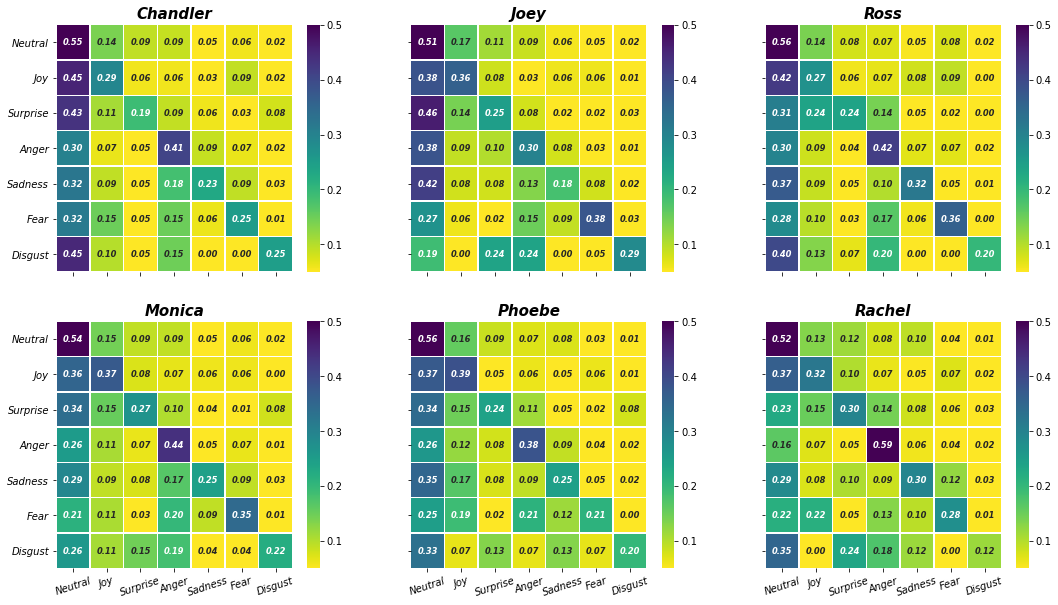

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.random((7,7,)))

fig,axn = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(18,10))
cbar_kws = { 'ticks' : [0, 0.1, 0.2, 0.3, 0.4, 0.5]}
annot_kws = {'weight': '650', 'size':'small', 'style': 'oblique'}
role_list = list(emotion_transition.keys())
print(role_list)
i = 0

## viridis_r, Pastel2_r, binary, mako_r, CMRmap_r, Blues

for ax in axn.flat:
    sns.heatmap(emotion_transition[role_list[i]], ax=ax, linewidths=0.5,  vmin=0.05, vmax=0.5, fmt='.2f', annot=True, cmap='viridis_r', \
                    cbar_kws=cbar_kws, annot_kws=annot_kws)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=-360, fontsize=10, fontstyle='oblique', fontweight='500')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=18, fontsize=10, fontstyle='oblique', fontweight='500')
    # ax.set_yticklabels([])
    # ax.set_xticklabels([])
    ax.set_ylim([7, 0])
    ax.set_title(role_list[i], fontsize=15, fontstyle='oblique', fontweight='600')
    i += 1

plt.savefig('./Emotion_transitions_total.png', dpi=500)

# Mood Transitions in PELD

In [41]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Personality_dict = {
    'Chandler' : '[0.648, 0.375, 0.386, 0.58, 0.477]',
    'Joey' : '[0.574, 0.614, 0.297, 0.545, 0.455]',
    'Ross' : '[0.722, 0.489, 0.6, 0.533, 0.356]',    
    'Monica' : '[0.713, 0.457, 0.457, 0.66, 0.511]',
    'Phoebe' : '[0.6, 0.48, 0.31, 0.46, 0.56]',
    'Rachel' : '[0.635, 0.354, 0.521, 0.552, 0.469]'

}

def get_mood_transition(df, role=None): 
    emo_transition = np.zeros([4,4])
    if not role:
        tmp_df = df
        title = 'Total'
    else:    
        p = Personality_dict[role]
        print(p)
        tmp_df = df[df['Speaker_1']==role]
        title = role
        
    emo_list = ['neutral', 'M1', 'M2', 'M3']
    print(tmp_df.shape)
    for i,r in tmp_df.iterrows():
        row = emo_list.index(r['Mood_1'])
        col = emo_list.index(r['Mood_3'])
        emo_transition[row][col] += 1
    
    cap_emo_list = ['Neutral', 'M1', 'M2', 'M3']
    emo_transition_df = pd.DataFrame(emo_transition, columns = cap_emo_list, index= cap_emo_list)
    emo_transition_ratio_df = emo_transition_df.div(emo_transition_df.sum(axis=1), axis=0)
    # print(emo_transition_df)
    # time.sleep(10)
    
    
    
    # plt.savefig('./Emotion_transitions_'+role+'.pdf', dpi=500)    
    return emo_transition_df, emo_transition_ratio_df

mood_transition = {}
for role in Personality_dict.keys():
    _, tmp = get_mood_transition(df_peld, role)
    mood_transition[role] = tmp

mood_transition 


[0.648, 0.375, 0.386, 0.58, 0.477]
(1088, 15)
[0.574, 0.614, 0.297, 0.545, 0.455]
(1125, 15)
[0.722, 0.489, 0.6, 0.533, 0.356]
(1125, 15)
[0.713, 0.457, 0.457, 0.66, 0.511]
(1053, 15)
[0.6, 0.48, 0.31, 0.46, 0.56]
(977, 15)
[0.635, 0.354, 0.521, 0.552, 0.469]
(1159, 15)


{'Chandler':           Neutral        M1        M2        M3
 Neutral  0.542636  0.236434  0.172481  0.048450
 M1       0.447552  0.335664  0.178322  0.038462
 M2       0.321267  0.149321  0.457014  0.072398
 M3       0.323077  0.138462  0.307692  0.230769,
 'Joey':           Neutral        M1        M2        M3
 Neutral  0.510166  0.280961  0.149723  0.059150
 M1       0.411243  0.428994  0.112426  0.047337
 M2       0.322581  0.155914  0.446237  0.075269
 M3       0.416667  0.166667  0.233333  0.183333,
 'Ross':           Neutral        M1        M2        M3
 Neutral  0.555556  0.220307  0.170498  0.053640
 M1       0.387218  0.379699  0.161654  0.071429
 M2       0.297297  0.131274  0.509653  0.061776
 M3       0.371795  0.141026  0.166667  0.320513,
 'Monica':           Neutral        M1        M2        M3
 Neutral  0.539863  0.239180  0.170843  0.050114
 M1       0.352751  0.440129  0.152104  0.055016
 M2       0.241667  0.175000  0.520833  0.062500
 M3       0.292308  0.169231

['Chandler', 'Joey', 'Ross', 'Monica', 'Phoebe', 'Rachel']


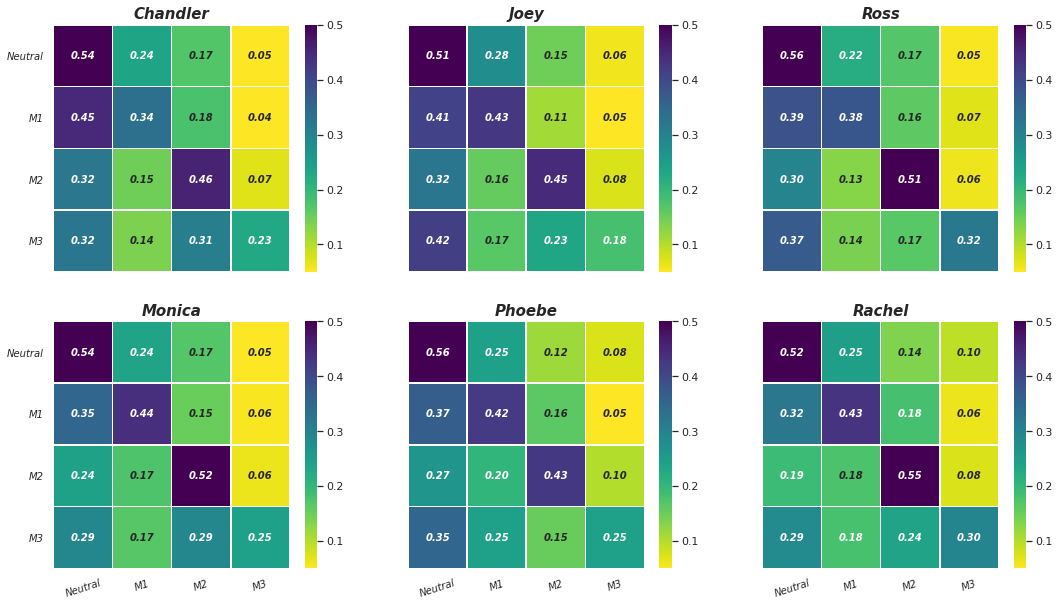

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.random((4,4,)))

fig,axn = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(18,10))
cbar_kws = { 'ticks' : [0, 0.1, 0.2, 0.3, 0.4, 0.5]}
annot_kws = {'weight': '650', 'size':'small', 'style': 'oblique'}
role_list = list(mood_transition.keys())
print(role_list)
i = 0

## viridis_r, Pastel2_r, binary, mako_r, CMRmap_r, Blues

for ax in axn.flat:
    sns.heatmap(mood_transition[role_list[i]], ax=ax, linewidths=0.5,  vmin=0.05, vmax=0.5, fmt='.2f', annot=True, cmap='viridis_r', \
                    cbar_kws=cbar_kws, annot_kws=annot_kws)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=-360, fontsize=10, fontstyle='oblique', fontweight='500')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=18, fontsize=10, fontstyle='oblique', fontweight='500')
    # ax.set_yticklabels([])
    # ax.set_xticklabels([])
    ax.set_ylim([4, 0])
    ax.set_title(role_list[i], fontsize=15, fontstyle='oblique', fontweight='600')
    i += 1

plt.savefig('./Mood_transitions_total.png', dpi=500)

49


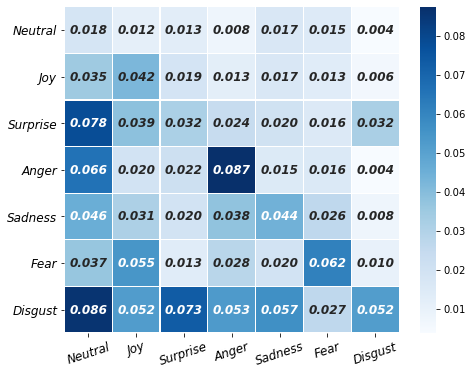

In [28]:
transition_mats = []
for role, matrix in emotion_transition.items():
    transition_mats.append(matrix.values)
    

# transition_mats
std_list = []
std_mat = np.random.random((7,7,))
for i in range(0,7):
    for j in range(0,7):
        std_ = np.std([transition_mats[0][i][j], transition_mats[1][i][j],
                            transition_mats[2][i][j], transition_mats[3][i][j],
                            transition_mats[4][i][j], transition_mats[5][i][j]])
        std_mat[i][j] = std_
        std_list.append(std_)
print(len(std_list))
# std_mat

plt.figure(figsize=(7.5, 6))
annot_kws = {'weight': '600', 'size':'large', 'style': 'oblique'}
ax = sns.heatmap(std_mat, linewidths=0.1, annot=True, cmap = 'Blues', fmt='.3f', annot_kws = annot_kws)
cap_emo_list = ['Neutral', 'Joy', 'Surprise', 'Anger', 'Sadness', 'Fear', 'Disgust']
ax.set_yticklabels(cap_emo_list, rotation=-360, fontsize=12, fontstyle='oblique', fontweight='550')
ax.set_xticklabels(cap_emo_list, rotation=18, fontsize=12, fontstyle='oblique', fontweight='550')
# ax.set_title("Emotion Transition STD Matrix", fontsize=15, fontstyle='oblique', fontweight='600')
plt.savefig('./Emotion_transitions_std.png', dpi=500)

16


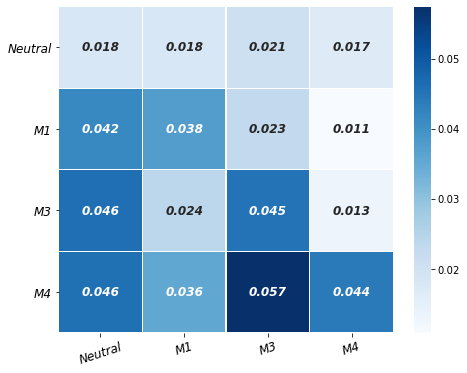

In [31]:
transition_mats = []
for role, matrix in mood_transition.items():
    transition_mats.append(matrix.values)
    

# transition_mats
std_list = []
std_mat = np.random.random((4,4,))
for i in range(0,4):
    for j in range(0,4):
        std_ = np.std([transition_mats[0][i][j], transition_mats[1][i][j],
                            transition_mats[2][i][j], transition_mats[3][i][j],
                            transition_mats[4][i][j], transition_mats[5][i][j]])
        std_mat[i][j] = std_
        std_list.append(std_)
print(len(std_list))
# std_mat

plt.figure(figsize=(7.5, 6))
annot_kws = {'weight': '600', 'size':'large', 'style': 'oblique'}
ax = sns.heatmap(std_mat, linewidths=0.1, annot=True, cmap = 'Blues', fmt='.3f', annot_kws = annot_kws)
cap_mood_list = ['Neutral', 'M1', 'M3', 'M4']
ax.set_yticklabels(cap_mood_list, rotation=-360, fontsize=12, fontstyle='oblique', fontweight='550')
ax.set_xticklabels(cap_mood_list, rotation=18, fontsize=12, fontstyle='oblique', fontweight='550')
# ax.set_title("Emotion Transition STD Matrix", fontsize=15, fontstyle='oblique', fontweight='600')
plt.savefig('./Mood_transitions_std.png', dpi=500)

[0.01823608383121535, 0.030875395730214583, 0.06250679191349058, 0.07259467421705613, 0.044002114728310386, 0.04604970749405263, 0.06467142269444347]
0
[0.013788155599960227, 0.015381471477778285, 0.0342700834323949, 0.041531562465313386, 0.023981681828167695, 0.02288247102612125, 0.038213579050437055]
1


<ipython-input-365-4573dc9a095b>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0.000', '0.010', '0.020', '0.030', '0.040', '0.050', '0.060', '0.070', '0.080'], fontsize=14, fontstyle='oblique', fontweight='550')
<ipython-input-365-4573dc9a095b>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0.000', '0.005', '0.010', '0.015', '0.020', '0.025', '0.030', '0.035', '0.040'], fontsize=14, fontstyle='oblique', fontweight='550')


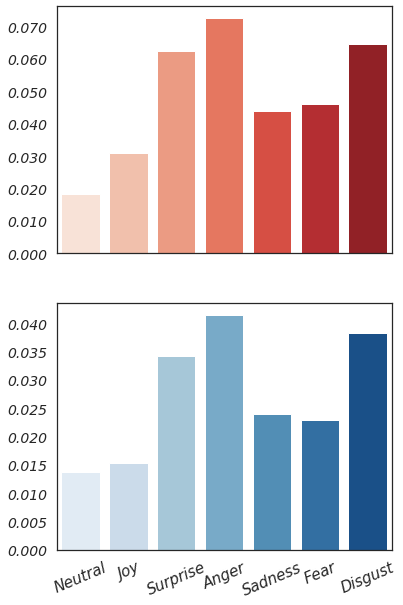

In [365]:

import seaborn as sns
sns.set(style="white") #设置绘图背景




transition_mats = []
for role, matrix in emotion_transition.items():
    transition_mats.append(matrix.values)
    

# transition_mats
order = np.inf



fig,axn = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(6,10))
cap_emo_list = ['Neutral', 'Joy', 'Surprise', 'Anger', 'Sadness', 'Fear', 'Disgust']
emos = np.arange(0,7)

cnt = 0
for ax in axn.flat:
    order = np.inf if cnt == 0 else 2
    color = "Reds" if cnt == 0 else "Blues"
    title = "STD of inf-norms"  if cnt == 0 else "STD of l2-norms"
    
    
    std_list = []
    std_mat = np.random.random((7,7,))
    for i in range(0,7):
        std_ = np.std(
#     for i in range(0,7):
#         std_ = np.std([np.linalg.norm(transition_mats[0][i], ord=order),
#                        np.linalg.norm(transition_mats[1][i], ord=order),
#                        np.linalg.norm(transition_mats[2][i], ord=order),
#                        np.linalg.norm(transition_mats[3][i], ord=order),
#                        np.linalg.norm(transition_mats[4][i], ord=order),
#                        np.linalg.norm(transition_mats[5][i], ord=order),])
#         std_list.append(std_);
    print(std_list)
    std_df = pd.DataFrame(std_list, columns=['std'])
    std_df['emo'] = cap_emo_list
    # std_df = std_df.sort_values(['std']).reset_index(drop=True)

    sns.barplot(x="emo", y="std", data=std_df, palette=color, ax=ax)
    ax.set_xticklabels(std_df['emo'], rotation=23, fontsize=15, fontstyle='oblique', fontweight='550')
    # ax.yticklabel
    print(cnt)
    if cnt == 0:
        ax.set_yticklabels(['0.000', '0.010', '0.020', '0.030', '0.040', '0.050', '0.060', '0.070', '0.080'], fontsize=14, fontstyle='oblique', fontweight='550')
        # ax.set_yticklabels(['0.0', '0.005', '0.010', '0.015', '0.020', '0.025', '0.030', '0.035', '0.040'], fontsize=15, fontstyle='oblique', fontweight='550')
    else:
        ax.set_yticklabels(['0.000', '0.005', '0.010', '0.015', '0.020', '0.025', '0.030', '0.035', '0.040'], fontsize=14, fontstyle='oblique', fontweight='550')
    ax.set_xlabel("",fontsize=20)
    ax.set_ylabel("",fontsize=20)
    cnt += 1

plt.savefig('./Emotion_transitions_std.png', dpi=600)

[0.01823608383121535, 0.019506402275551324, 0.04542678016287046, 0.044002114728310386]
0
[0.010283813573168156, 0.011917866609218914, 0.022069304020001648, 0.011753160880346981]
1


<ipython-input-33-885983c44a68>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0.000', '0.010', '0.020', '0.030', '0.040', '0.050', '0.060', '0.070', '0.080'], fontsize=14, fontstyle='oblique', fontweight='550')
<ipython-input-33-885983c44a68>:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0.000', '0.005', '0.010', '0.015', '0.020', '0.025', '0.030', '0.035', '0.040'], fontsize=14, fontstyle='oblique', fontweight='550')


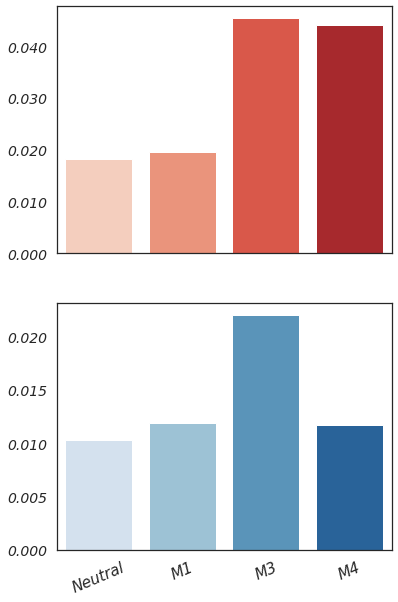

In [33]:

import seaborn as sns
sns.set(style="white") #设置绘图背景

transition_mats = []
for role, matrix in mood_transition.items():
    transition_mats.append(matrix.values)
    

# transition_mats
order = np.inf



fig,axn = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(6,10))
cap_mood_list = ['Neutral', 'M1', 'M3', 'M4']
emos = np.arange(0,4)

cnt = 0
for ax in axn.flat:
    order = np.inf if cnt == 0 else 2
    color = "Reds" if cnt == 0 else "Blues"
    title = "STD of inf-norms"  if cnt == 0 else "STD of l2-norms"
    
    
    std_list = []
    std_mat = np.random.random((4,4,))

    for i in range(0,4):
        std_ = np.std([np.linalg.norm(transition_mats[0][i], ord=order),
                       np.linalg.norm(transition_mats[1][i], ord=order),
                       np.linalg.norm(transition_mats[2][i], ord=order),
                       np.linalg.norm(transition_mats[3][i], ord=order),
                       np.linalg.norm(transition_mats[4][i], ord=order),
                       np.linalg.norm(transition_mats[5][i], ord=order),])
        std_list.append(std_);
    print(std_list)
    std_df = pd.DataFrame(std_list, columns=['std'])
    std_df['emo'] = cap_mood_list
    # std_df = std_df.sort_values(['std']).reset_index(drop=True)

    sns.barplot(x="emo", y="std", data=std_df, palette=color, ax=ax)
    ax.set_xticklabels(std_df['emo'], rotation=23, fontsize=15, fontstyle='oblique', fontweight='550')
    # ax.yticklabel
    print(cnt)
    if cnt == 0:
        ax.set_yticklabels(['0.000', '0.010', '0.020', '0.030', '0.040', '0.050', '0.060', '0.070', '0.080'], fontsize=14, fontstyle='oblique', fontweight='550')
        # ax.set_yticklabels(['0.0', '0.005', '0.010', '0.015', '0.020', '0.025', '0.030', '0.035', '0.040'], fontsize=15, fontstyle='oblique', fontweight='550')
    else:
        ax.set_yticklabels(['0.000', '0.005', '0.010', '0.015', '0.020', '0.025', '0.030', '0.035', '0.040'], fontsize=14, fontstyle='oblique', fontweight='550')
    ax.set_xlabel("",fontsize=20)
    ax.set_ylabel("",fontsize=20)
    cnt += 1

plt.savefig('./Mood_transitions_std.png', dpi=600)

In [355]:
np.linspace(0, 0.08, 9)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08])

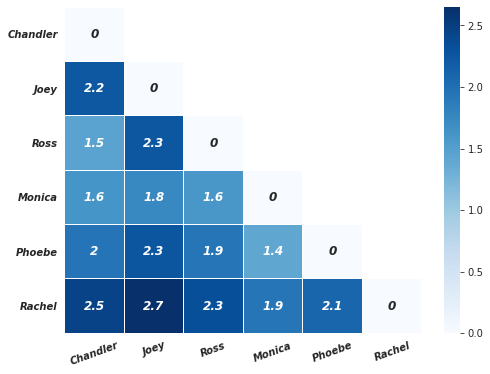

In [184]:
Personality_dict = {
    'Chandler' : [0.648, 0.375, 0.386, 0.58, 0.477],
    'Joey' : [0.574, 0.614, 0.297, 0.545, 0.455],
    'Ross' : [0.722, 0.489, 0.6, 0.533, 0.356],
    'Monica' : [0.713, 0.457, 0.457, 0.66, 0.511],
    'Phoebe' : [0.6, 0.48, 0.31, 0.46, 0.56],
    'Rachel' : [0.635, 0.354, 0.521, 0.552, 0.469],   
}

import math
transition_mats = []
for role, matrix in emotion_transition.items():
    transition_mats.append(matrix)
    
from sklearn.metrics.pairwise import manhattan_distances
from scipy.stats import entropy 
ans_mat = np.zeros([6,6])

sns.set_style("white")
def cal_distance(mat1, mat2):
    ## KL entropy by row
    '''
    ans = 0
    for i in range(len(mat1)):
        ans += abs(entropy(mat1.to_numpy(), mat2.to_numpy()))
    return ans
    '''
    ## Square Error Sum
    ans = 0
    mat1 = mat1.to_numpy()
    mat2 = mat2.to_numpy()
    for i in range(len(mat1)):
        for j in range(len(mat2)):
            ans += math.sqrt((mat1[i][j] - mat2[i][j])**2)
    ans = float(ans) 
    
    # n1 = np.linalg.norm(mat1-mat2, ord='fro')
    # n2 = np.linalg.norm(mat2, ord='fro')
    # ans = abs(n1)
    return ans
    
    


for i in range(6):
    for j in range(6):
        ans_mat[i][j] = cal_distance(transition_mats[i], transition_mats[j])
        ans_mat[j][i] = cal_distance(transition_mats[i], transition_mats[j])

plt.figure(figsize=(8, 6))
annot_kws = {'weight': '650', 'size':'large', 'style': 'oblique'}

mask = np.zeros_like(ans_mat)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

ax = sns.heatmap(ans_mat, linewidths=0.1, annot=True, cmap = 'Blues', annot_kws = annot_kws, mask=mask)
ax.set_yticklabels([i for i in Personality_dict.keys()], rotation=-360, fontsize=10, fontstyle='oblique', fontweight='650')
ax.set_xticklabels([i for i in Personality_dict.keys()], rotation=20, fontsize=10, fontstyle='oblique', fontweight='650')
ax.set_ylim([6, 0])
# ax.set_title('Differences  Emotion Transition', fontsize=15)

plt.savefig('./Senti_trans_differences.pdf', dpi=500)        